## 一、 背景介绍

MNIST 手写数字数据集是机器学习领域中广泛使用的图像分类数据集。它包含 60,000 个训练样本和 10,000 个测试样本。这些数字已进行尺寸规格化,并在固定尺寸的图像中居中。每个样本都是一个 784×1 的矩阵,是从原始的 28×28灰度图像转换而来的。MNIST 中的数字范围是 0 到 9。下面显示了一些示例。 

![示例图片](../1.%20Softmax实现手写数字识别(MNIST)/img/mnist.png)

## 二、实验目的


构建自己的多层感知机，实现MNIST 手写数字识别

### 本案例要求如下
- #### 实现SGD优化器 (`./optimizer.py`)
- #### 实现全连接层FCLayer前向和后向计算 (`layers/fc_layer.py`)
- #### 实现激活层SigmoidLayer前向和后向计算 (`layers/sigmoid_layer.py`)
- #### 实现激活层ReLULayer前向和后向计算 (`layers/relu_layer.py`)
- #### 实现损失层EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### 实现损失层SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

## 三、评价指标
* Accuracy 准确率: 分类正确的样本数除以总样本数。

## 四、实验过程
见各个训练文件
* train.ipynb                       本文件    
* mlp_1 momentum.ipynb              训练过程，尝试加入动量  
* mlp_2 learning_rate_SGD.ipynb     训练过程，尝试不同的学习率  
* mlp_3 weight_decay.ipynb          训练过程，尝试不同的权重衰减率  
* mlp_4 batch_size.ipynb            训练过程，尝试不同的正则化系数  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

### 4.1读入MNIST数据集

* <font color="red">使用tensorflow keras来加载，也可以使用torchvision.datasets。</font>
* <font color="red">下载有问题的也可以直接使用示例《1. Softmax实现手写数字识别(MNIST)》的本地文件加载方式</font>

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # 归一化处理
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # 将标签变为one-hot编码
    return tf.one_hot(label, depth=10)

In [4]:
# 数据预处理
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

### 4.2超参数设置

In [14]:
# batch_size = 100
# max_epoch = 20
# init_std = 0.01

# learning_rate_SGD = 0.001
# weight_decay = 0.1

# disp_freq = 50

batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

### 4.3. 使用欧式距离损失训练多层感知机(MLP with Euclidean Loss)
第一部分将使用欧式距离损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.

In [15]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

#### 4.3.1 使用欧式距离损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和Sigmoid激活函数.


In [16]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [17]:
sigmoidMLP, sigmoid_loss1, sigmoid_acc1 = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 7.0290	 Accuracy 0.1400
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.1590	 Accuracy 0.1263
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.3968	 Accuracy 0.1282
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.1254	 Accuracy 0.1396
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.9861	 Accuracy 0.1502
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.8998	 Accuracy 0.1582
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.8397	 Accuracy 0.1683
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.7946	 Accuracy 0.1775
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.7595	 Accuracy 0.1858
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.7304	 Accuracy 0.1940
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.7066	 Accuracy 0.2022

Epoch [0]	 Average training loss 0.6856	 Average training accuracy 0.2111
Epoch [0]	 Average validation loss 0.4619	 Average validation accuracy 0.3268

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.4761	 Accuracy 0.2900

In [18]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7774.



0.7774

#### 4.3.2 使用欧式距离损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和ReLU激活函数.


In [19]:
from layers import ReLULayer

reluMLP = Network()
# 使用FCLayer和ReLULayer构建多层感知机
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [20]:
reluMLP, relu_loss1, relu_acc1 = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.6447	 Accuracy 0.1300
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.0115	 Accuracy 0.1102
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.7406	 Accuracy 0.1257
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.5791	 Accuracy 0.1444
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.4622	 Accuracy 0.1607
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.3717	 Accuracy 0.1767
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.2954	 Accuracy 0.1954
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.2334	 Accuracy 0.2088
Epoch [0][20]	 Batch [400][550]	 Training Loss 1.1809	 Accuracy 0.2216
Epoch [0][20]	 Batch [450][550]	 Training Loss 1.1348	 Accuracy 0.2339
Epoch [0][20]	 Batch [500][550]	 Training Loss 1.0945	 Accuracy 0.2477

Epoch [0]	 Average training loss 1.0583	 Average training accuracy 0.2600
Epoch [0]	 Average validation loss 0.6544	 Average validation accuracy 0.4140

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.6135	 Accuracy 0.4100

In [21]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8565.



0.8565

#### 4.3.3 绘制曲线

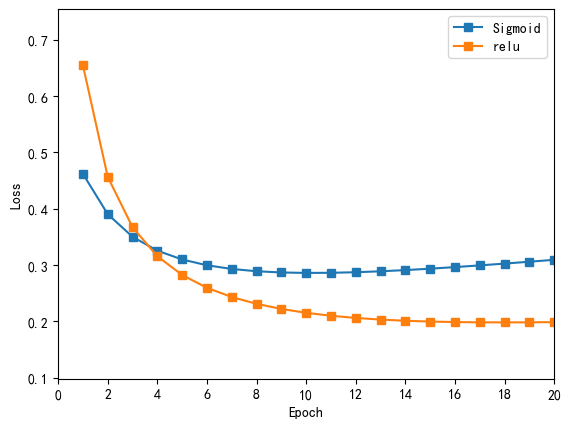

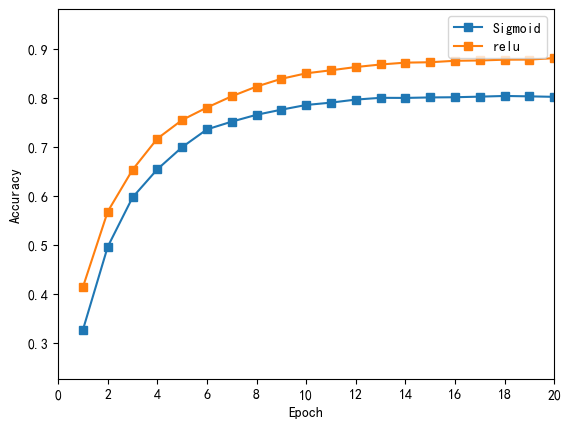

In [22]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss1, sigmoid_acc1],
                   'relu': [relu_loss1, relu_acc1]})

### 4.4. 使用Softmax交叉熵损失训练多层感知机(MLP with Softmax Cross-Entropy Loss)
第二部分将使用Softmax交叉熵损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.

In [23]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

#### 4.4.1 使用Softmax交叉熵损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和Sigmoid激活函数.

In [24]:
sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

训练

In [25]:
sigmoidMLP, sigmoid_loss2, sigmoid_acc2 = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.7918	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.7811	 Accuracy 0.0986
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.6891	 Accuracy 0.0981
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.6266	 Accuracy 0.1008
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.5775	 Accuracy 0.1028
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.5397	 Accuracy 0.1065
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.5104	 Accuracy 0.1109
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.4841	 Accuracy 0.1158
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.4606	 Accuracy 0.1232
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.4406	 Accuracy 0.1297
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.4215	 Accuracy 0.1378

Epoch [0]	 Average training loss 2.4051	 Average training accuracy 0.1461
Epoch [0]	 Average validation loss 2.2343	 Average validation accuracy 0.2256

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.1840	 Accuracy 0.2800

测试

In [26]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.6943.



0.6942999999999999

#### 4.4.2 使用Softmax交叉熵损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和ReLU激活函数.

In [27]:
reluMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [28]:
reluMLP, relu_loss2, relu_acc2 = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.4728	 Accuracy 0.0400
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.4086	 Accuracy 0.0769
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.3452	 Accuracy 0.0962
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.2873	 Accuracy 0.1211
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.2389	 Accuracy 0.1473
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.1932	 Accuracy 0.1754
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.1483	 Accuracy 0.2072
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.1120	 Accuracy 0.2336
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.0781	 Accuracy 0.2594
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.0473	 Accuracy 0.2831
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.0165	 Accuracy 0.3055

Epoch [0]	 Average training loss 1.9870	 Average training accuracy 0.3275
Epoch [0]	 Average validation loss 1.6407	 Average validation accuracy 0.5750

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.6187	 Accuracy 0.6400

In [29]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8692.



0.8692000000000002

#### 4.4.3 绘制曲线

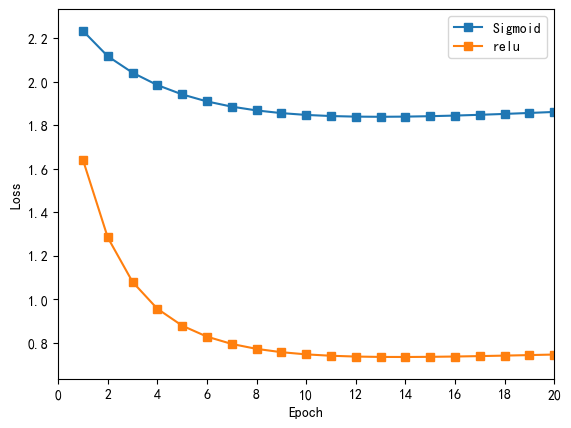

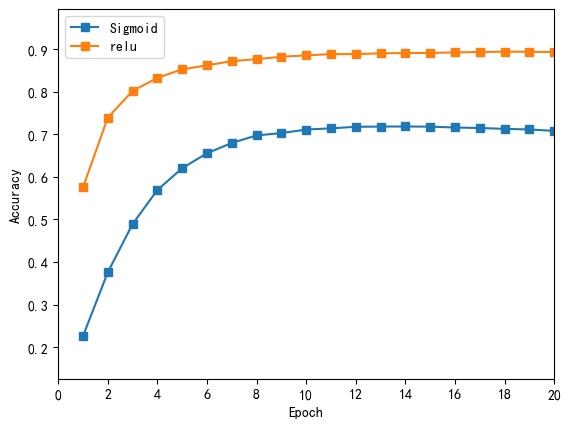

In [30]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss2, sigmoid_acc2],
                   'relu': [relu_loss2, relu_acc2]})

默认参数下对比


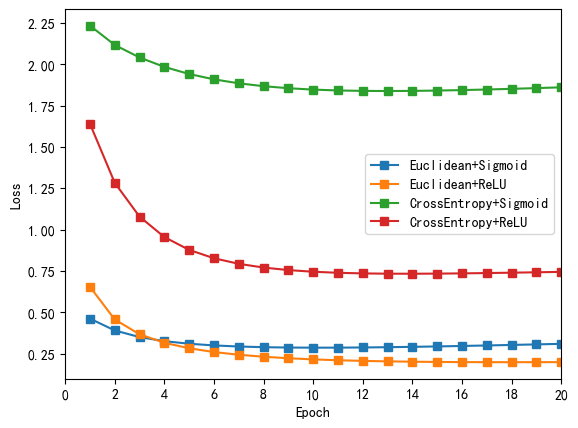

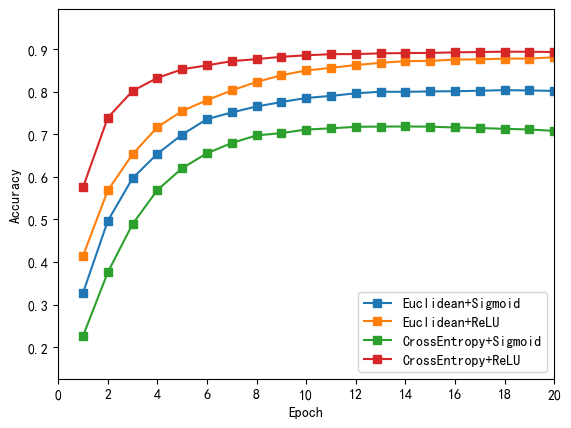

In [31]:
plot_loss_and_acc({'Euclidean+Sigmoid': [sigmoid_loss1, sigmoid_acc1],
                   'Euclidean+ReLU': [relu_loss1, relu_acc1],
                   'CrossEntropy+Sigmoid':  [sigmoid_loss2, sigmoid_acc2],
                   'CrossEntropy+ReLU': [relu_loss2, relu_acc2]})

In [32]:
np.mean(sigmoid_loss1),np.mean(sigmoid_acc1),np.mean(relu_loss1),np.mean(relu_acc1)

(0.3127026087945578, 0.72933, 0.2630535916988853, 0.7961000000000001)

In [33]:
np.mean(sigmoid_loss2),np.mean(sigmoid_acc2),np.mean(relu_loss2),np.mean(relu_acc2)

(1.9075082560290375, 0.64375, 0.8551942800106801, 0.85483)

plot_loss_and_acc({'Euclidean+Sigmoid': [sigmoid_loss1, sigmoid_acc1],
                   'Euclidean+ReLU': [relu_loss1, relu_acc1],
                   'CrossEntropy+Sigmoid':  [sigmoid_loss2, sigmoid_acc2],
                   'CrossEntropy+ReLU': [relu_loss2, relu_acc2]})

### 4.5. 具有单层隐含层的多层感知机最佳模型和参数

In [34]:
import os
import time
from criterion import EuclideanLossLayer,SoftmaxCrossEntropyLossLayer
from optimizer import SGD
from layers import FCLayer, SigmoidLayer, ReLULayer
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd
exec_result = pd.DataFrame(columns=['mode','batch_size','learning_rate_SGD', 'momentum','weight_decay','time','loss_validate','acc_validate','acc_test'])

learning_rate_SGD = 0.001
batch_size =10
max_epoch = 30
disp_freq = 50
init_std = 0.01

#Euclidean+Sigmoid
momentum = 0.55
weight_decay= 0.0001
criterion = EuclideanLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay,momentum)
t1=time.time()
sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
sigmoid_acc_test =test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)
t2=time.time()
exec_result.loc[exec_result.shape[0]] = ['Euclidean_Sigmoid',batch_size, learning_rate_SGD, momentum, weight_decay, t2-t1,sigmoid_loss, sigmoid_acc, sigmoid_acc_test]   

#Euclidean+ReLU
momentum = 0.99
weight_decay= 0.0001
criterion = EuclideanLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay,momentum)
t1=time.time()
reluMLP = Network()
# 使用FCLayer和ReLULayer构建多层感知机
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
relu_acc_test =test(reluMLP, criterion, data_test, batch_size, disp_freq)
t2=time.time()
exec_result.loc[exec_result.shape[0]] = ['Euclidean_ReLU',batch_size, learning_rate_SGD, momentum, weight_decay, t2-t1,relu_loss, relu_acc,relu_acc_test]     

#CrossEntropy+Sigmoid
momentum = 0.55
weight_decay= 0.00001
criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay,momentum)
t1=time.time()
sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
sigmoid_acc_test =test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)
t2=time.time()
exec_result.loc[exec_result.shape[0]] = ['CrossEntropy_Sigmoid',batch_size, learning_rate_SGD, momentum, weight_decay, t2-t1,sigmoid_loss, sigmoid_acc, sigmoid_acc_test]         

#CrossEntropy+ReLU
momentum = 0.99
weight_decay= 0.00001
criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay,momentum)
reluMLP = Network()
t1=time.time()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
relu_acc_test =test(reluMLP, criterion, data_test, batch_size, disp_freq)
t2=time.time()
exec_result.loc[exec_result.shape[0]] = ['CrossEntropy_ReLU',batch_size, learning_rate_SGD, momentum, weight_decay, t2-t1,relu_loss, relu_acc, relu_acc_test]      

Epoch [0][30]	 Batch [0][5500]	 Training Loss 4.1226	 Accuracy 0.1000
Epoch [0][30]	 Batch [50][5500]	 Training Loss 1.0670	 Accuracy 0.1020
Epoch [0][30]	 Batch [100][5500]	 Training Loss 0.8354	 Accuracy 0.1168
Epoch [0][30]	 Batch [150][5500]	 Training Loss 0.7555	 Accuracy 0.1265
Epoch [0][30]	 Batch [200][5500]	 Training Loss 0.7079	 Accuracy 0.1358
Epoch [0][30]	 Batch [250][5500]	 Training Loss 0.6743	 Accuracy 0.1494
Epoch [0][30]	 Batch [300][5500]	 Training Loss 0.6460	 Accuracy 0.1718
Epoch [0][30]	 Batch [350][5500]	 Training Loss 0.6232	 Accuracy 0.1866
Epoch [0][30]	 Batch [400][5500]	 Training Loss 0.6051	 Accuracy 0.2020
Epoch [0][30]	 Batch [450][5500]	 Training Loss 0.5899	 Accuracy 0.2173
Epoch [0][30]	 Batch [500][5500]	 Training Loss 0.5759	 Accuracy 0.2355
Epoch [0][30]	 Batch [550][5500]	 Training Loss 0.5614	 Accuracy 0.2584
Epoch [0][30]	 Batch [600][5500]	 Training Loss 0.5498	 Accuracy 0.2744
Epoch [0][30]	 Batch [650][5500]	 Training Loss 0.5385	 Accuracy 0.

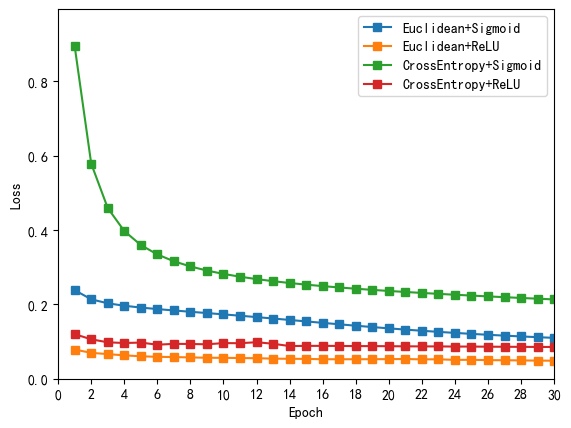

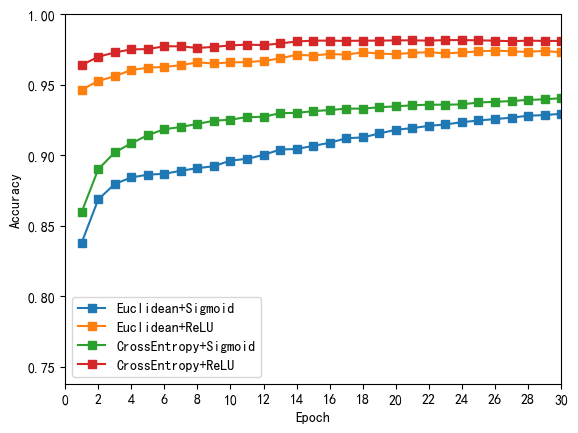

In [35]:
plot_loss_and_acc({'Euclidean+Sigmoid': [exec_result.loc[0].loss_validate, exec_result.loc[0].acc_validate],
                   'Euclidean+ReLU': [exec_result.loc[1].loss_validate, exec_result.loc[1].acc_validate],
                   'CrossEntropy+Sigmoid':  [exec_result.loc[2].loss_validate, exec_result.loc[2].acc_validate],
                   'CrossEntropy+ReLU': [exec_result.loc[3].loss_validate, exec_result.loc[3].acc_validate]})

In [36]:
exec_result
exec_result['acc_validate_float'] = exec_result['acc_validate'].map(lambda x: np.average(x))
exec_result.to_csv('./result/result_bestaccs.csv',index=False)

In [12]:
exec_result

,mode,batch_size,learning_rate_SGD,momentum,weight_decay,time,loss_validate,acc_validate,acc_test,acc_validate_float
0,Euclidean_Sigmoid,10,0.001,0.55,0.00010,349.379198,"[0.23836118365678977, 0.21362315250851602, 0.2...","[0.838, 0.8686, 0.8796000000000002, 0.88420000...",0.9161,0.904627
1,Euclidean_ReLU,10,0.001,0.99,0.00010,391.413110,"[0.07845318137437149, 0.06966425223821666, 0.0...","[0.9464000000000001, 0.9526000000000001, 0.956...",0.9661,0.967840
2,CrossEntropy_Sigmoid,10,0.001,0.55,0.00001,429.770796,"[0.8944735146564363, 0.5787039352339894, 0.459...","[0.8598000000000001, 0.89, 0.902, 0.9084000000...",0.9267,0.925740
3,CrossEntropy_ReLU,10,0.001,0.99,0.00001,393.383177,"[0.11989968974397595, 0.10602467090037623, 0.0...","[0.9638, 0.9698000000000001, 0.972800000000000...",0.9802,0.978580


### 4.6.具有多层隐含层的多层感知机

接下来，根据案例要求，还需要完成**构造具有两个隐含层的多层感知机，自行选取合适的激活函数和损失函数，与只有一个隐含层的结果相比较**.

注意: 请在下方插入新的代码块，不要直接修改上面的代码.

In [7]:
import os
import time
from criterion import EuclideanLossLayer,SoftmaxCrossEntropyLossLayer
from optimizer import SGD
from layers import FCLayer, SigmoidLayer, ReLULayer
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd
exec_result2 = pd.DataFrame(columns=['mode','hid_layer','number_of_neurons','time','loss_validate','acc_validate','acc_test'])

learning_rate_SGD = 0.001
batch_size =10
max_epoch = 30
disp_freq = 50
init_std = 0.01
momentum = 0.90
weight_decay= 0.00001

#CrossEntropy+ReLU+1隐含层
criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay,momentum)
reluMLP = Network()
t1=time.time()
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
relu_acc_test =test(reluMLP, criterion, data_test, batch_size, disp_freq)
t2=time.time()
exec_result2.loc[exec_result2.shape[0]] = ['CrossEntropy_ReLU', 1, '128', t2-t1,relu_loss, relu_acc, relu_acc_test]  

#CrossEntropy+ReLU+2隐含层
criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay,momentum)
reluMLP = Network()
t1=time.time()
reluMLP.add(FCLayer(784, 512))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(512, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
relu_acc_test =test(reluMLP, criterion, data_test, batch_size, disp_freq)
t2=time.time()
exec_result2.loc[exec_result2.shape[0]] = ['CrossEntropy_ReLU', 2, '512,128', t2-t1,relu_loss, relu_acc, relu_acc_test]  

#CrossEntropy+ReLU+2隐含层
criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay,momentum)
reluMLP = Network()
t1=time.time()
reluMLP.add(FCLayer(784, 256))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(256, 64))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(64, 10))
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
relu_acc_test =test(reluMLP, criterion, data_test, batch_size, disp_freq)
t2=time.time()
exec_result2.loc[exec_result2.shape[0]] = ['CrossEntropy_ReLU', 2, '256,64', t2-t1,relu_loss, relu_acc, relu_acc_test]  

#CrossEntropy+ReLU+2隐含层
criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay,momentum)
reluMLP = Network()
t1=time.time()
reluMLP.add(FCLayer(784, 300))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(300, 100))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(100, 10))
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
relu_acc_test =test(reluMLP, criterion, data_test, batch_size, disp_freq)
t2=time.time()
exec_result2.loc[exec_result2.shape[0]] = ['CrossEntropy_ReLU', 2, '300,100', t2-t1,relu_loss, relu_acc, relu_acc_test]  

#CrossEntropy+ReLU+3隐含层
criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay,momentum)
reluMLP = Network()
t1=time.time()
reluMLP.add(FCLayer(784, 512))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(512, 256))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(256, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
relu_acc_test =test(reluMLP, criterion, data_test, batch_size, disp_freq)
t2=time.time()
exec_result2.loc[exec_result2.shape[0]] = ['CrossEntropy_ReLU', 3, '512,256,128', t2-t1,relu_loss, relu_acc, relu_acc_test]  

#CrossEntropy+ReLU+4隐含层
criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay,momentum)
reluMLP = Network()
t1=time.time()
reluMLP.add(FCLayer(784, 512))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(512, 256))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(256, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 64))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(64, 10))
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
relu_acc_test =test(reluMLP, criterion, data_test, batch_size, disp_freq)
t2=time.time()
exec_result2.loc[exec_result2.shape[0]] = ['CrossEntropy_ReLU', 3, '512,256,128,64', t2-t1,relu_loss, relu_acc, relu_acc_test]  

Epoch [0][30]	 Batch [0][5500]	 Training Loss 2.3711	 Accuracy 0.1000
Epoch [0][30]	 Batch [50][5500]	 Training Loss 2.0152	 Accuracy 0.3235
Epoch [0][30]	 Batch [100][5500]	 Training Loss 1.6825	 Accuracy 0.4792
Epoch [0][30]	 Batch [150][5500]	 Training Loss 1.4421	 Accuracy 0.5709
Epoch [0][30]	 Batch [200][5500]	 Training Loss 1.2568	 Accuracy 0.6323
Epoch [0][30]	 Batch [250][5500]	 Training Loss 1.1206	 Accuracy 0.6741
Epoch [0][30]	 Batch [300][5500]	 Training Loss 1.0228	 Accuracy 0.7043
Epoch [0][30]	 Batch [350][5500]	 Training Loss 0.9464	 Accuracy 0.7313
Epoch [0][30]	 Batch [400][5500]	 Training Loss 0.8849	 Accuracy 0.7494
Epoch [0][30]	 Batch [450][5500]	 Training Loss 0.8360	 Accuracy 0.7630
Epoch [0][30]	 Batch [500][5500]	 Training Loss 0.7935	 Accuracy 0.7745
Epoch [0][30]	 Batch [550][5500]	 Training Loss 0.7575	 Accuracy 0.7853
Epoch [0][30]	 Batch [600][5500]	 Training Loss 0.7254	 Accuracy 0.7945
Epoch [0][30]	 Batch [650][5500]	 Training Loss 0.6939	 Accuracy 0.

In [6]:
exec_result2['acc_validate_float'] = exec_result2['acc_validate'].map(lambda x: np.average(x))
exec_result2


,mode,batch_size,learning_rate_SGD,momentum,weight_decay,time,loss_validate,acc_validate,acc_test,acc_validate_float
0,CrossEntropy_ReLU_2Hidden,10,0.001,0.99,0.00001,896.925900,"[0.11949462972625886, 0.09438919389988301, 0.0...","[0.966, 0.9728000000000001, 0.9755999999999999...",0.9865,0.983507
1,CrossEntropy_ReLU_3Hidden,10,0.001,0.99,0.00001,1105.222249,"[0.1115921364747895, 0.1182899032331471, 0.100...","[0.9663999999999999, 0.967, 0.9728000000000001...",0.9842,0.979707
2,CrossEntropy_ReLU_3Hidden,10,0.001,0.99,0.00001,1225.801615,"[0.13315443972962399, 0.1064612811148712, 0.08...","[0.9618000000000001, 0.9698, 0.977200000000000...",0.9837,0.979000


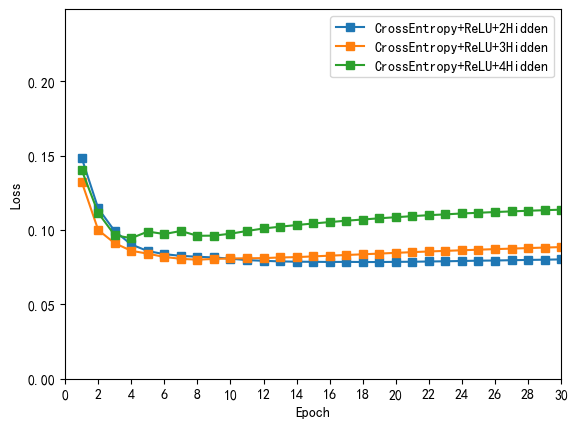

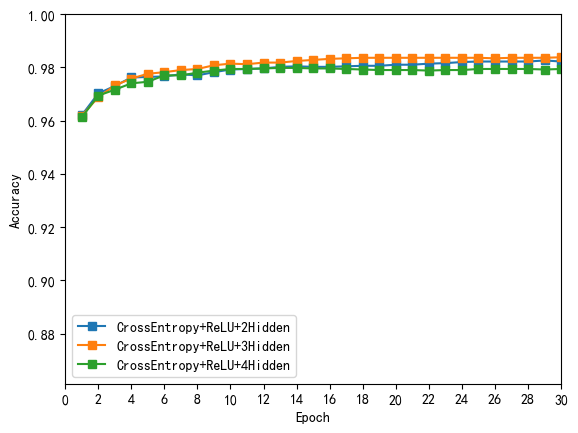

In [15]:
plot_loss_and_acc({'CrossEntropy+ReLU+1Hidden': [exec_result.loc[3].loss_validate, exec_result.loc[3].acc_validate],
                   'CrossEntropy+ReLU+2Hidden': [exec_result2.loc[0].loss_validate, exec_result2.loc[0].acc_validate],
                   'CrossEntropy+ReLU+3Hidden': [exec_result2.loc[1].loss_validate, exec_result2.loc[1].acc_validate],
                   'CrossEntropy+ReLU+4Hidden': [exec_result2.loc[2].loss_validate, exec_result2.loc[2].acc_validate]})

## 五、结果记录

### 单层隐含层的感知机
| model | batch size | learning rate SGD | momentum | weight decay | acc validate | acc test |
|----------|----------|----------|---------|----------|----------|----------|
| Euclidean+Sigmoid     | 10 | 0.001 | 0.55 | 0.0001    | 0.9046 | 0.9161 | 
| Euclidean+ReLU        | 10 | 0.001 | 0.99 | 0.0001    | 0.9678 | 0.9661 | 
| CrossEntropy+Sigmoid  | 10 | 0.001 | 0.55 | 0.00001   | 0.9257 | 0.9267 | 
| CrossEntropy+ReLU     | 10 | 0.001 | 0.99 | 0.00001   | 0.9786 | 0.9802 | 
*  <font color="red">注:batch size-批大小; learning rate SGD-学习率;momentum-动量;weight decay-权重衰减率。</font>

### 具有多层隐含层的多层感知机

| model | hid_layers | neurons | train time | acc validate | acc test |
|----------|----------|----------|---------|----------|----------|
| CrossEntropy+ReLU | 1 | 128               | 321.255   | 0.9799 | 0.9812 | 
| CrossEntropy+ReLU | 2 | 512,128           | 997.467   | 0.9841 | 0.9851 | 
| CrossEntropy+ReLU | 2 | 256,64            | 552.641   | 0.9801 | 0.9831 | 
| CrossEntropy+ReLU | 2 | 300,100           | 640.250   | 0.9816 | 0.9829 | 
| CrossEntropy+ReLU | 3 | 512,256,128       | 1326.537  | 0.9801 | 0.9818 | 
| CrossEntropy+ReLU | 4 | 512,256,128,64    | 1421.584  | 0.9802 | 0.9833 | 
*  <font color="red">注:hid_layers-隐含层的个数; neurons-全连接层神经元的数量;train time-模型训练共花费时间。单位(秒)。</font>